In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk
import string

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Predator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import missingno as msno

# Reading the Data 

In [6]:
df = pd.read_csv('all-data.csv',encoding='unicode-escape',header=None)
df.columns = ['Sentiment', 'News Headlines']

In [7]:
df.head()

,Sentiment,News Headlines
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [8]:
df.describe()

,Sentiment,News Headlines
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


<AxesSubplot:>

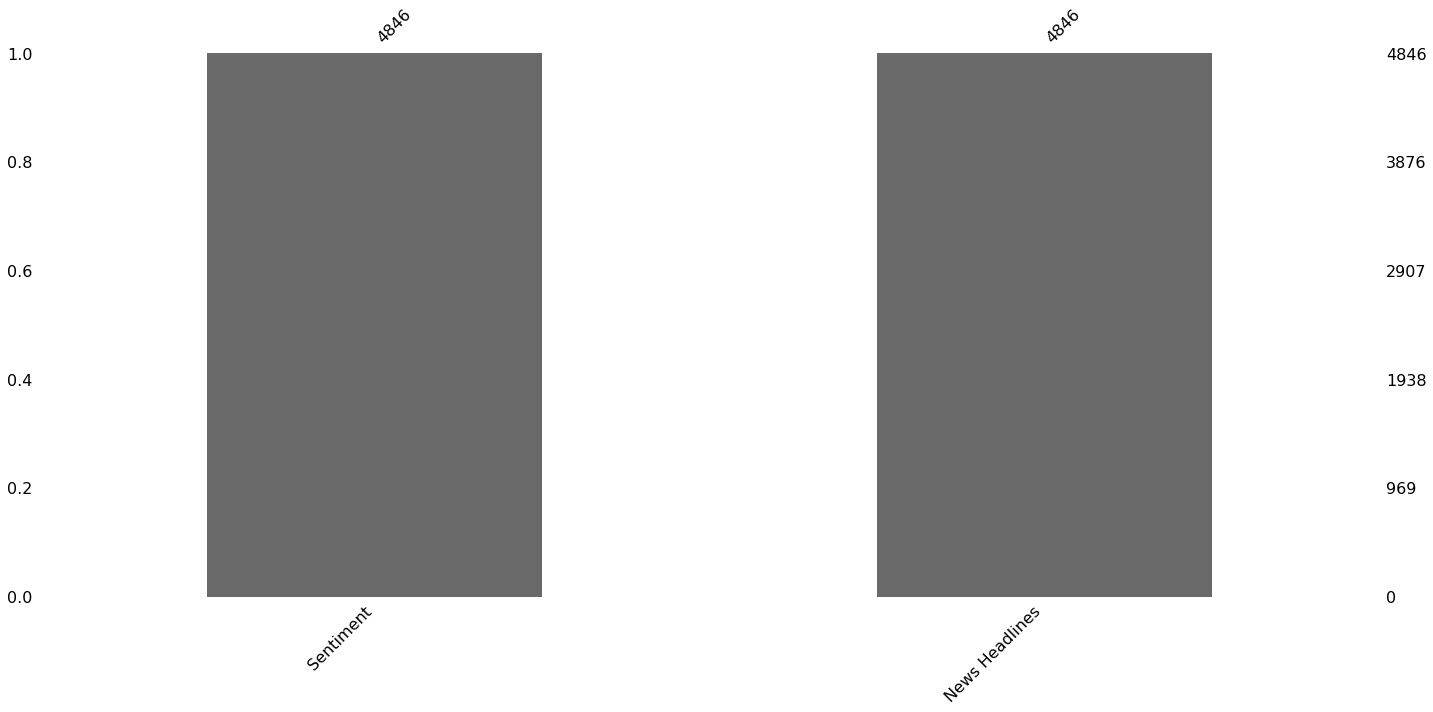

In [9]:
msno.bar(df)

Here, it can be seen that there are no null values present and that there are a total of 4846 non-nul observations in both of the columns

## Checking the count for the target variables

In [10]:
df['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

In [11]:
df['Sentiment'].value_counts().values

array([2879, 1363,  604], dtype=int64)

<AxesSubplot:>

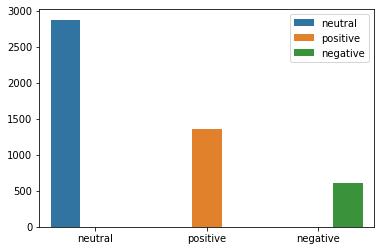

In [12]:
sns.barplot(x=df['Sentiment'].value_counts().index,y=df['Sentiment'].value_counts().values,hue=df['Sentiment'].value_counts().index )

Here, upon checking the count for target variables, it can be seen that the dataset is imbalanced. We have the lowest number of observations for negative class at around 600 observations, then we have more than double of that amount for the positive class and we have double than that of positive class for the neutral class

### Creating New columns after removing punctuation

In [13]:
dir(string)

['Formatter',
 'Template',
 '_ChainMap',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_re',
 '_sentinel_dict',
 '_string',
 'ascii_letters',
 'ascii_lowercase',
 'ascii_uppercase',
 'capwords',
 'digits',
 'hexdigits',
 'octdigits',
 'printable',
 'punctuation',
 'whitespace']

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
string.digits

'0123456789'

In [16]:
def remove_punctuation(text):
    text = "".join([i for i in text if i not in string.punctuation])
    return text

In [17]:
df['Punctuation Removed'] = df['News Headlines'].apply(lambda x: remove_punctuation(x))

In [18]:
df

,Sentiment,News Headlines,Punctuation Removed
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...,The international electronic industry company ...
3,positive,With the new production plant the company woul...,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,LONDON MarketWatch Share prices ended lower i...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,Rinkuskiai s beer sales fell by 65 per cent to...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,Operating profit fell to EUR 354 mn from EUR 6...
4844,negative,Net sales of the Paper segment decreased to EU...,Net sales of the Paper segment decreased to EU...


In [19]:
def remove_numbers(text):
    text = "".join([i for i in text if i not in string.digits])
    return text

In [20]:
df['Numbers Removed'] = df['Punctuation Removed'].apply(lambda x: remove_numbers(x))

## Lowering the text case

In [21]:
df['lowered_textcase'] = df['Numbers Removed'].apply(lambda x: x.lower())

In [22]:
df.head()

,Sentiment,News Headlines,Punctuation Removed,Numbers Removed,lowered_textcase
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...,According to Gran the company has no plans to...,according to gran the company has no plans to...
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...,The international electronic industry company ...,The international electronic industry company ...,the international electronic industry company ...
3,positive,With the new production plant the company woul...,With the new production plant the company woul...,With the new production plant the company woul...,with the new production plant the company woul...
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...,According to the company s updated strategy fo...,according to the company s updated strategy fo...


## Creating Tokens from Sentences

In [23]:
df['tokens'] = df['lowered_textcase'].str.split(' ')

In [24]:
df

,Sentiment,News Headlines,Punctuation Removed,Numbers Removed,lowered_textcase,tokens
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...,According to Gran the company has no plans to...,according to gran the company has no plans to...,"[according, to, gran, , the, company, has, no,..."
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ..."
2,negative,The international electronic industry company ...,The international electronic industry company ...,The international electronic industry company ...,the international electronic industry company ...,"[the, international, electronic, industry, com..."
3,positive,With the new production plant the company woul...,With the new production plant the company woul...,With the new production plant the company woul...,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa..."
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...,According to the company s updated strategy fo...,according to the company s updated strategy fo...,"[according, to, the, company, s, updated, stra..."
...,...,...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,LONDON MarketWatch Share prices ended lower i...,LONDON MarketWatch Share prices ended lower i...,london marketwatch share prices ended lower i...,"[london, marketwatch, , share, prices, ended, ..."
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,Rinkuskiai s beer sales fell by 65 per cent to...,Rinkuskiai s beer sales fell by per cent to ...,rinkuskiai s beer sales fell by per cent to ...,"[rinkuskiai, s, beer, sales, fell, by, , per, ..."
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,Operating profit fell to EUR 354 mn from EUR 6...,Operating profit fell to EUR mn from EUR mn ...,operating profit fell to eur mn from eur mn ...,"[operating, profit, fell, to, eur, , mn, from,..."
4844,negative,Net sales of the Paper segment decreased to EU...,Net sales of the Paper segment decreased to EU...,Net sales of the Paper segment decreased to EU...,net sales of the paper segment decreased to eu...,"[net, sales, of, the, paper, segment, decrease..."


## Removing the stop words

In [25]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
def remove_stopwords(msg_tokenized):
    tokens = []
    stopwords = nltk.corpus.stopwords.words('english')
    for token in msg_tokenized:
        if token not in stopwords:
            tokens.append(token)
    return tokens

In [27]:
df['tokens_wo_sw'] = df['tokens'].apply(lambda x: remove_stopwords(x))

In [28]:
df

,Sentiment,News Headlines,Punctuation Removed,Numbers Removed,lowered_textcase,tokens,tokens_wo_sw
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...,According to Gran the company has no plans to...,according to gran the company has no plans to...,"[according, to, gran, , the, company, has, no,...","[according, gran, , company, plans, move, prod..."
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plans, develop, stages, area, le..."
2,negative,The international electronic industry company ...,The international electronic industry company ...,The international electronic industry company ...,the international electronic industry company ...,"[the, international, electronic, industry, com...","[international, electronic, industry, company,..."
3,positive,With the new production plant the company woul...,With the new production plant the company woul...,With the new production plant the company woul...,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre..."
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...,According to the company s updated strategy fo...,according to the company s updated strategy fo...,"[according, to, the, company, s, updated, stra...","[according, company, updated, strategy, years,..."
...,...,...,...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,LONDON MarketWatch Share prices ended lower i...,LONDON MarketWatch Share prices ended lower i...,london marketwatch share prices ended lower i...,"[london, marketwatch, , share, prices, ended, ...","[london, marketwatch, , share, prices, ended, ..."
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,Rinkuskiai s beer sales fell by 65 per cent to...,Rinkuskiai s beer sales fell by per cent to ...,rinkuskiai s beer sales fell by per cent to ...,"[rinkuskiai, s, beer, sales, fell, by, , per, ...","[rinkuskiai, beer, sales, fell, , per, cent, ,..."
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,Operating profit fell to EUR 354 mn from EUR 6...,Operating profit fell to EUR mn from EUR mn ...,operating profit fell to eur mn from eur mn ...,"[operating, profit, fell, to, eur, , mn, from,...","[operating, profit, fell, eur, , mn, eur, , mn..."
4844,negative,Net sales of the Paper segment decreased to EU...,Net sales of the Paper segment decreased to EU...,Net sales of the Paper segment decreased to EU...,net sales of the paper segment decreased to eu...,"[net, sales, of, the, paper, segment, decrease...","[net, sales, paper, segment, decreased, eur, ,..."


## Reducing empty wordplace

In [29]:
def remove_emptywordplace(msg_tokenized):
    tokens = []
    for token in msg_tokenized:
        if token != '':
            tokens.append(token)
    return tokens

In [30]:
df['cleaned_tokens'] = df['tokens_wo_sw'].apply(lambda x: remove_emptywordplace(x))

In [31]:
df.head()

,Sentiment,News Headlines,Punctuation Removed,Numbers Removed,lowered_textcase,tokens,tokens_wo_sw,cleaned_tokens
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...,According to Gran the company has no plans to...,according to gran the company has no plans to...,"[according, to, gran, , the, company, has, no,...","[according, gran, , company, plans, move, prod...","[according, gran, company, plans, move, produc..."
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plans, develop, stages, area, le...","[technopolis, plans, develop, stages, area, le..."
2,negative,The international electronic industry company ...,The international electronic industry company ...,The international electronic industry company ...,the international electronic industry company ...,"[the, international, electronic, industry, com...","[international, electronic, industry, company,...","[international, electronic, industry, company,..."
3,positive,With the new production plant the company woul...,With the new production plant the company woul...,With the new production plant the company woul...,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre...","[new, production, plant, company, would, incre..."
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...,According to the company s updated strategy fo...,according to the company s updated strategy fo...,"[according, to, the, company, s, updated, stra...","[according, company, updated, strategy, years,...","[according, company, updated, strategy, years,..."


## Reducing the words to their base form - Stemming

In [32]:
from nltk.stem.porter import PorterStemmer

In [33]:
def stemming(tokens):
    porter_stemmer = PorterStemmer()
    stem_tokens = [porter_stemmer.stem(token) for token in tokens]
    return stem_tokens

In [34]:
df['msg_stemmed'] = df['cleaned_tokens'].apply(lambda x: stemming(x))

In [35]:
df

,Sentiment,News Headlines,Punctuation Removed,Numbers Removed,lowered_textcase,tokens,tokens_wo_sw,cleaned_tokens,msg_stemmed
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...,According to Gran the company has no plans to...,according to gran the company has no plans to...,"[according, to, gran, , the, company, has, no,...","[according, gran, , company, plans, move, prod...","[according, gran, company, plans, move, produc...","[accord, gran, compani, plan, move, product, r..."
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plans, develop, stages, area, le...","[technopolis, plans, develop, stages, area, le...","[technopoli, plan, develop, stage, area, less,..."
2,negative,The international electronic industry company ...,The international electronic industry company ...,The international electronic industry company ...,the international electronic industry company ...,"[the, international, electronic, industry, com...","[international, electronic, industry, company,...","[international, electronic, industry, company,...","[intern, electron, industri, compani, elcoteq,..."
3,positive,With the new production plant the company woul...,With the new production plant the company woul...,With the new production plant the company woul...,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre...","[new, production, plant, company, would, incre...","[new, product, plant, compani, would, increas,..."
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...,According to the company s updated strategy fo...,according to the company s updated strategy fo...,"[according, to, the, company, s, updated, stra...","[according, company, updated, strategy, years,...","[according, company, updated, strategy, years,...","[accord, compani, updat, strategi, year, baswa..."
...,...,...,...,...,...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,LONDON MarketWatch Share prices ended lower i...,LONDON MarketWatch Share prices ended lower i...,london marketwatch share prices ended lower i...,"[london, marketwatch, , share, prices, ended, ...","[london, marketwatch, , share, prices, ended, ...","[london, marketwatch, share, prices, ended, lo...","[london, marketwatch, share, price, end, lower..."
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,Rinkuskiai s beer sales fell by 65 per cent to...,Rinkuskiai s beer sales fell by per cent to ...,rinkuskiai s beer sales fell by per cent to ...,"[rinkuskiai, s, beer, sales, fell, by, , per, ...","[rinkuskiai, beer, sales, fell, , per, cent, ,...","[rinkuskiai, beer, sales, fell, per, cent, mil...","[rinkuskiai, beer, sale, fell, per, cent, mill..."
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,Operating profit fell to EUR 354 mn from EUR 6...,Operating profit fell to EUR mn from EUR mn ...,operating profit fell to eur mn from eur mn ...,"[operating, profit, fell, to, eur, , mn, from,...","[operating, profit, fell, eur, , mn, eur, , mn...","[operating, profit, fell, eur, mn, eur, mn, in...","[oper, profit, fell, eur, mn, eur, mn, includ,..."
4844,negative,Net sales of the Paper segment decreased to EU...,Net sales of the Paper segment decreased to EU...,Net sales of the Paper segment decreased to EU...,net sales of the paper segment decreased to eu...,"[net, sales, of, the, paper, segment, decrease...","[net, sales, paper, segment, decreased, eur, ,...","[net, sales, paper, segment, decreased, eur, m...","[net, sale, paper, segment, decreas, eur, mn, ..."


In [36]:
df.head()

,Sentiment,News Headlines,Punctuation Removed,Numbers Removed,lowered_textcase,tokens,tokens_wo_sw,cleaned_tokens,msg_stemmed
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...,According to Gran the company has no plans to...,according to gran the company has no plans to...,"[according, to, gran, , the, company, has, no,...","[according, gran, , company, plans, move, prod...","[according, gran, company, plans, move, produc...","[accord, gran, compani, plan, move, product, r..."
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plans, develop, stages, area, le...","[technopolis, plans, develop, stages, area, le...","[technopoli, plan, develop, stage, area, less,..."
2,negative,The international electronic industry company ...,The international electronic industry company ...,The international electronic industry company ...,the international electronic industry company ...,"[the, international, electronic, industry, com...","[international, electronic, industry, company,...","[international, electronic, industry, company,...","[intern, electron, industri, compani, elcoteq,..."
3,positive,With the new production plant the company woul...,With the new production plant the company woul...,With the new production plant the company woul...,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre...","[new, production, plant, company, would, incre...","[new, product, plant, compani, would, increas,..."
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...,According to the company s updated strategy fo...,according to the company s updated strategy fo...,"[according, to, the, company, s, updated, stra...","[according, company, updated, strategy, years,...","[according, company, updated, strategy, years,...","[accord, compani, updat, strategi, year, baswa..."


## Creating a new dataframe removing unwanted columns

In [37]:
df['cleaned_msg'] = df['msg_stemmed'].apply(lambda x: ' '.join(x))

In [38]:
df.head()

,Sentiment,News Headlines,Punctuation Removed,Numbers Removed,lowered_textcase,tokens,tokens_wo_sw,cleaned_tokens,msg_stemmed,cleaned_msg
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...,According to Gran the company has no plans to...,according to gran the company has no plans to...,"[according, to, gran, , the, company, has, no,...","[according, gran, , company, plans, move, prod...","[according, gran, company, plans, move, produc...","[accord, gran, compani, plan, move, product, r...",accord gran compani plan move product russia a...
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plans, develop, stages, area, le...","[technopolis, plans, develop, stages, area, le...","[technopoli, plan, develop, stage, area, less,...",technopoli plan develop stage area less squar ...
2,negative,The international electronic industry company ...,The international electronic industry company ...,The international electronic industry company ...,the international electronic industry company ...,"[the, international, electronic, industry, com...","[international, electronic, industry, company,...","[international, electronic, industry, company,...","[intern, electron, industri, compani, elcoteq,...",intern electron industri compani elcoteq laid ...
3,positive,With the new production plant the company woul...,With the new production plant the company woul...,With the new production plant the company woul...,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre...","[new, production, plant, company, would, incre...","[new, product, plant, compani, would, increas,...",new product plant compani would increas capac ...
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...,According to the company s updated strategy fo...,according to the company s updated strategy fo...,"[according, to, the, company, s, updated, stra...","[according, company, updated, strategy, years,...","[according, company, updated, strategy, years,...","[accord, compani, updat, strategi, year, baswa...",accord compani updat strategi year baswar targ...


In [39]:
new_df = df.drop(df.iloc[:,1:-1], axis=1)

In [40]:
new_df.head()

,Sentiment,cleaned_msg
0,neutral,accord gran compani plan move product russia a...
1,neutral,technopoli plan develop stage area less squar ...
2,negative,intern electron industri compani elcoteq laid ...
3,positive,new product plant compani would increas capac ...
4,positive,accord compani updat strategi year baswar targ...


In [41]:
new_df['Target Label'] = new_df['Sentiment'].map({
    'neutral': 1,
    'positive': 2,
    'negative': 0
})

In [42]:
new_df.head()

,Sentiment,cleaned_msg,Target Label
0,neutral,accord gran compani plan move product russia a...,1
1,neutral,technopoli plan develop stage area less squar ...,1
2,negative,intern electron industri compani elcoteq laid ...,0
3,positive,new product plant compani would increas capac ...,2
4,positive,accord compani updat strategi year baswar targ...,2


## Creating Bag of Words using sklearn

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

The CountVectorizer converts the collection of text documents to a matrix of token counts.

In [44]:
new_df['cleaned_msg'].values.tolist()

['accord gran compani plan move product russia although compani grow',
 'technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said',
 'intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report',
 'new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit',
 'accord compani updat strategi year baswar target longterm net sale growth rang oper profit margin net sale',
 'financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb',
 'last quarter componenta net sale doubl eurm eurm period year earlier move zero pretax profit pretax loss eurm',
 'third quarter net sale increas eur mn oper profit eur mn',
 'oper profit rose eur mn eur mn correspond period repres net sale',
 'oper profit total eur mn e

In [45]:
count_vectorizer = CountVectorizer()
content = new_df['cleaned_msg'].values.tolist()
X = count_vectorizer.fit_transform(content)
single_count_matrix = pd.DataFrame(X.toarray(), columns = count_vectorizer.get_feature_names(), index=content)
single_count_matrix.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zip,zloti,zoltan,zone,zoo,zte,zu,zxx,ænekoski,ðl
accord gran compani plan move product russia although compani grow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accord compani updat strategi year baswar target longterm net sale growth rang oper profit margin net sale,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
single_count_matrix.shape

(4846, 7127)

In [47]:
# bigram = CountVectorizer(ngram_range=(2,2))
# content = new_df['cleaned_msg'].values.tolist()
# X = bigram.fit_transform(content)
# bigram_count_matrix = pd.DataFrame(X.toarray(), columns = bigram.get_feature_names(), index=content)
# bigram_count_matrix.head()

In [48]:
# trigram = CountVectorizer(ngram_range=(3,3))
# content = new_df['cleaned_msg'].values.tolist()
# X = trigram.fit_transform(content)
# trigram_count_matrix = pd.DataFrame(X.toarray(), columns = trigram.get_feature_names(), index=content)
# trigram_count_matrix.head()

## TfidfTransformer

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer

Computing the idf values

In [50]:
tfidf = TfidfTransformer()
tfidf.fit(single_count_matrix)

TfidfTransformer()

In [51]:
tfidf.idf_

array([8.79296806, 8.79296806, 8.79296806, ..., 8.79296806, 8.09982087,
       8.79296806])

In [52]:
df_idf = pd.DataFrame(tfidf.idf_, index=count_vectorizer.get_feature_names())
df_idf

,0
aaland,8.792968
aalborg,8.792968
aalto,8.792968
aaltonen,8.792968
aaron,8.792968
...,...
zte,8.792968
zu,8.792968
zxx,8.792968
ænekoski,8.099821


In [53]:
df_idf.idxmax(), df_idf.max()

(0    aaland
 dtype: object,
 0    8.792968
 dtype: float64)

In [54]:
df_idf.idxmin(), df_idf.min()

(0    compani
 dtype: object,
 0    2.680393
 dtype: float64)

Here, we can see that the word 'compani' seems to appear accross multiple documents, hence its weight is scaled down and hence have theh lowest idf value. 

In [55]:
tf_idf_vector = tfidf.transform(single_count_matrix)

In [56]:
tf_idf_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
tf_idf_vector.shape

(4846, 7127)

In [58]:
tfidf_df = pd.DataFrame(tf_idf_vector.toarray(),columns = count_vectorizer.get_feature_names(), index=content)
tfidf_df.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zip,zloti,zoltan,zone,zoo,zte,zu,zxx,ænekoski,ðl
accord gran compani plan move product russia although compani grow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accord compani updat strategi year baswar target longterm net sale growth rang oper profit margin net sale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
tfidf_df['Target Label'] = new_df['Target Label'].values

In [60]:
tfidf_df.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zloti,zoltan,zone,zoo,zte,zu,zxx,ænekoski,ðl,Target Label
accord gran compani plan move product russia although compani grow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
technopoli plan develop stage area less squar meter order host compani work comput technolog telecommun statement said,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
accord compani updat strategi year baswar target longterm net sale growth rang oper profit margin net sale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
NBmodel = MultinomialNB()

In [63]:
X = tfidf_df.drop('Target Label', axis=1)
y = tfidf_df['Target Label']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
NBmodel.fit(X_train,y_train)

MultinomialNB()

In [67]:
y_pred_class = NBmodel.predict(X_test)

In [68]:
y_pred_class

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [69]:
# measuring accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.66375

In [70]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_class)
print(confusion_matrix)

[[  6 133  53]
 [  0 910  27]
 [  1 324 146]]


In [71]:
# Classification report
print("Classification report")
print(classification_report(y_test,y_pred_class))

Classification report
              precision    recall  f1-score   support

           0       0.86      0.03      0.06       192
           1       0.67      0.97      0.79       937
           2       0.65      0.31      0.42       471

    accuracy                           0.66      1600
   macro avg       0.72      0.44      0.42      1600
weighted avg       0.68      0.66      0.59      1600

